In [112]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [113]:
import matplotlib.pyplot as plt
import numpy as np

from problems import Metric

In [114]:
def benchmark_pb(pb, is_drawable=False, show_sol=False):
    if is_drawable:
        pb.plot_fct()

    if is_drawable or show_sol:
        trials = pb.run_trials(n_iter=100, n_trials=1, eg_eta=1, ergodic=False)

    if is_drawable:
        pb.compare_trials_path(trials, title='non-ergodic')

    if show_sol:
        for algo, algo_trials in trials.items():
            trial = algo_trials[0]
            print(f'''Solution {algo}:
                {trial[-1][0]}
                {trial[-1][1]}''')

    if is_drawable:
        trials = pb.run_trials(n_iter=100, n_trials=1, eg_eta=1, ergodic=True)
        pb.compare_trials_path(trials, title='ergodic')

    trials_no_ergo = pb.run_trials(n_iter=1000, n_trials=20, eg_eta=1, ergodic=False)
    trials_ergo = pb.run_trials(n_iter=1000, n_trials=20, eg_eta=1, ergodic=True)


    _, axs = plt.subplots(1, 2, figsize=(10, 5))
    pb.plot_trials_convergence(trials_no_ergo, Metric.OPT_DIST, title='non-ergodic', ax=axs[0])
    pb.plot_trials_convergence(trials_ergo, Metric.OPT_DIST, title='ergodic', ax=axs[1], show_legend=True, show_metric_title=False)

    _, axs = plt.subplots(1, 2, figsize=(10, 5))
    pb.plot_trials_convergence(trials_no_ergo, Metric.GRAD_NORM, title='non-ergodic', ax=axs[0])
    pb.plot_trials_convergence(trials_ergo, Metric.GRAD_NORM, title='ergodic', ax=axs[1], show_legend=True, show_metric_title=False)

# Bilinear

$$
\min_{\theta} \max_{\phi} (\theta - x_1^*) (\phi - x_2^*)
$$

trials ({'eg_eta': 1, 'ergodic': True}): 100%|██████████| 20/20 [00:01<00:00, 14.34it/s]


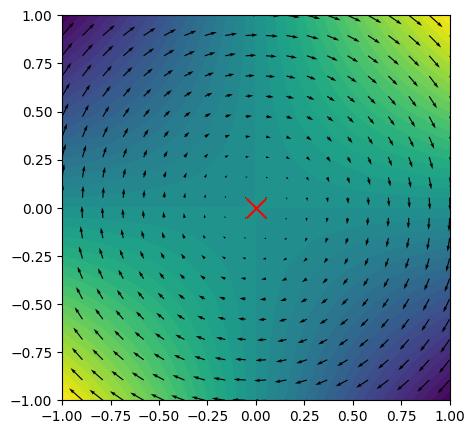

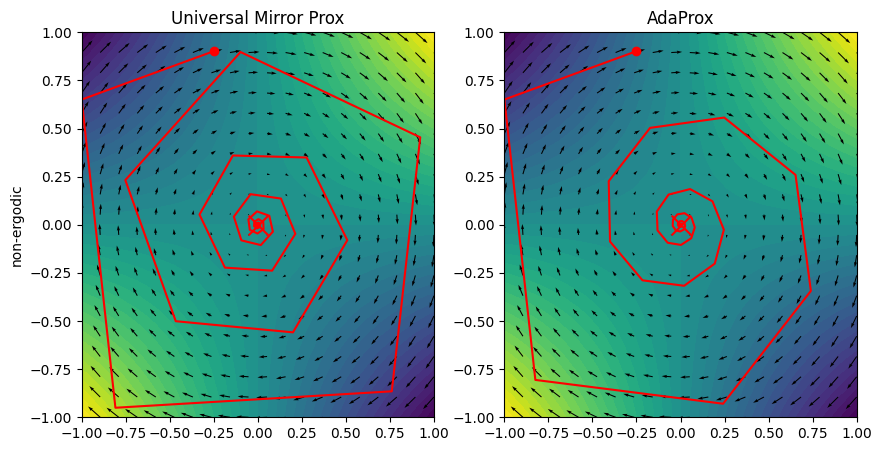

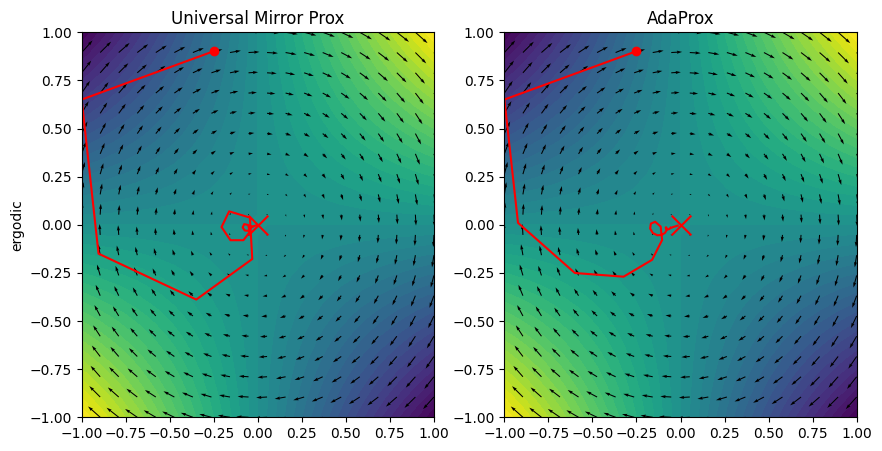

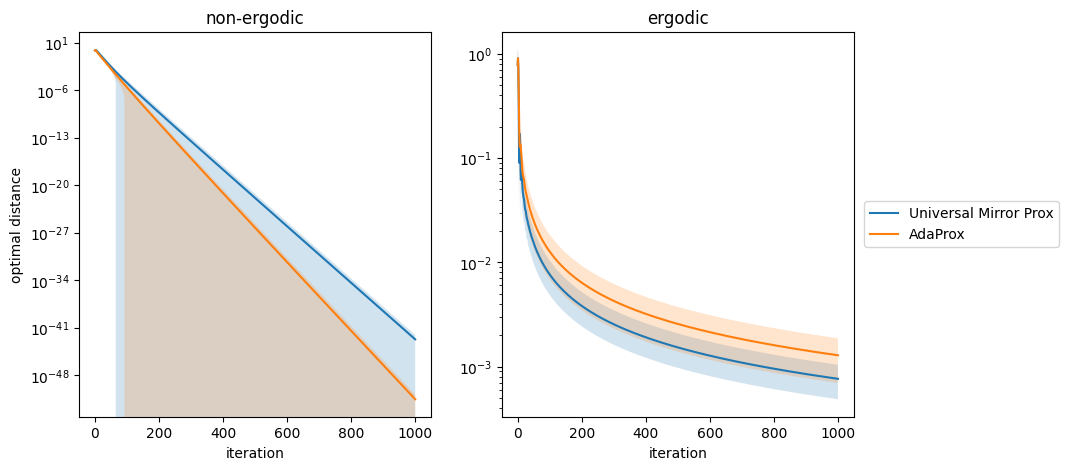

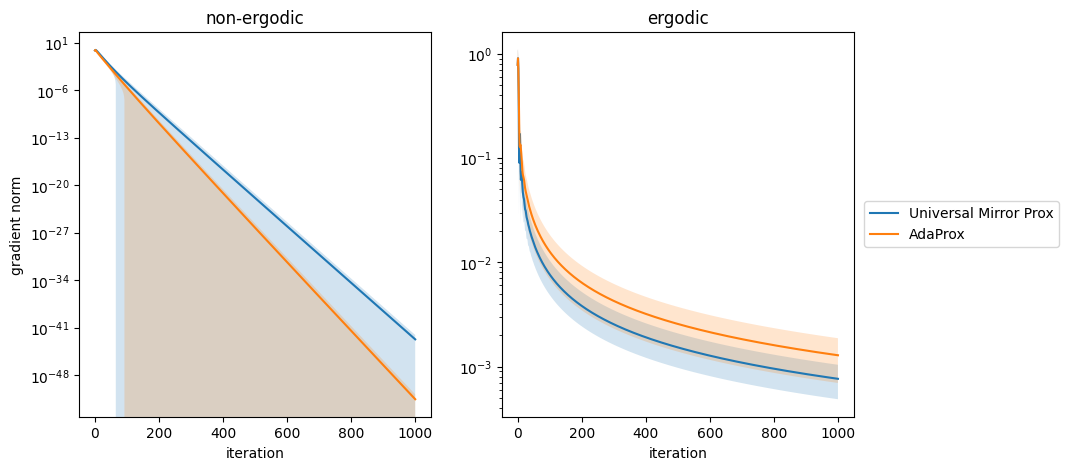

In [115]:
from problems import BilinearPb

pb = BilinearPb()
benchmark_pb(pb, is_drawable=True)

# Rock-Paper-Scissors

trials ({'eg_eta': 1, 'ergodic': False}): 100%|██████████| 1/1 [00:00<00:00, 57.41it/s]


Solution Universal Mirror Prox:
                [0.33332238 0.3333425  0.33333512]
                [0.33334506 0.33332358 0.33333136]
Solution AdaProx:
                [0.33333476 0.33333206 0.33333318]
                [0.33333208 0.33333436 0.33333356]


trials ({'eg_eta': 1, 'ergodic': True}): 100%|██████████| 20/20 [00:02<00:00,  7.00it/s]


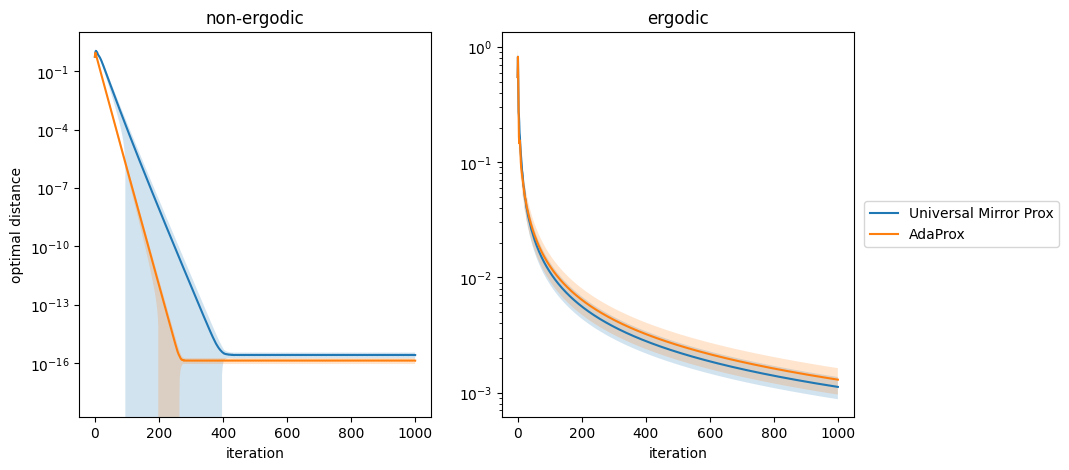

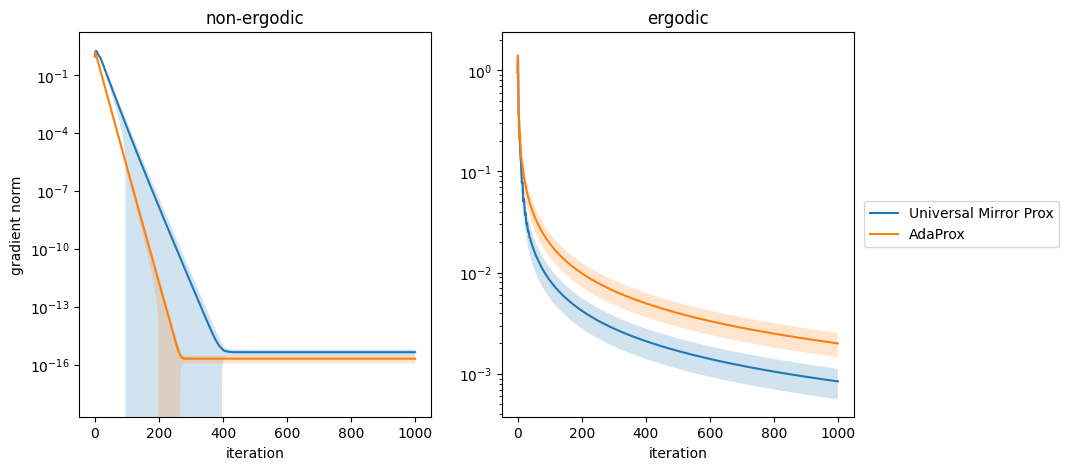

In [116]:
from problems import RockPaperScissorsPb

pb = RockPaperScissorsPb()
benchmark_pb(pb, show_sol=True)

# Battle of the sexes

trials ({'eg_eta': 1, 'ergodic': False}): 100%|██████████| 1/1 [00:00<00:00, 58.79it/s]


Solution Universal Mirror Prox:
                1.0
                1.0
Solution AdaProx:
                1.0
                1.0


trials ({'eg_eta': 1, 'ergodic': True}): 100%|██████████| 20/20 [00:02<00:00,  7.86it/s]


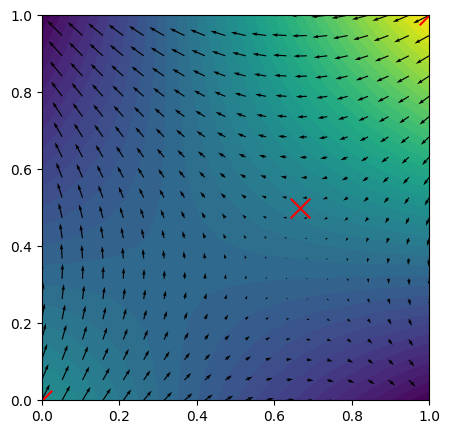

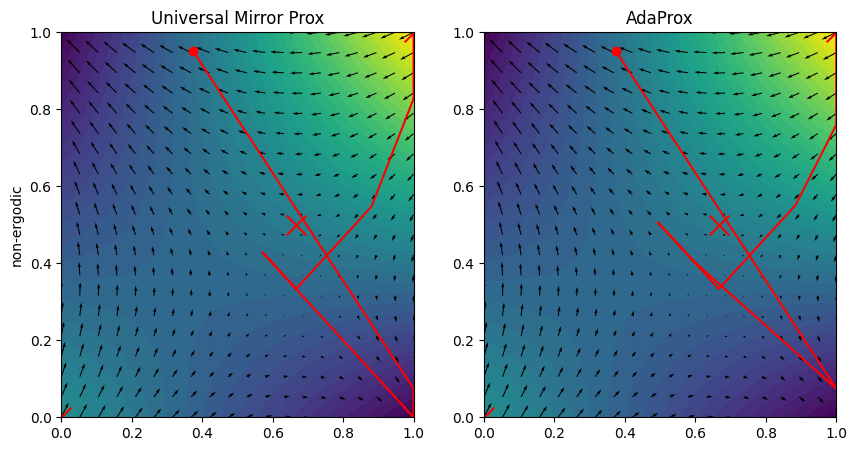

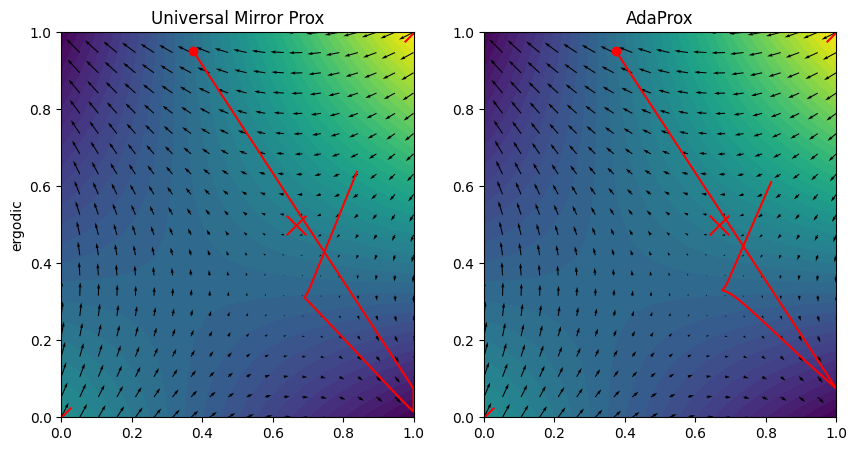

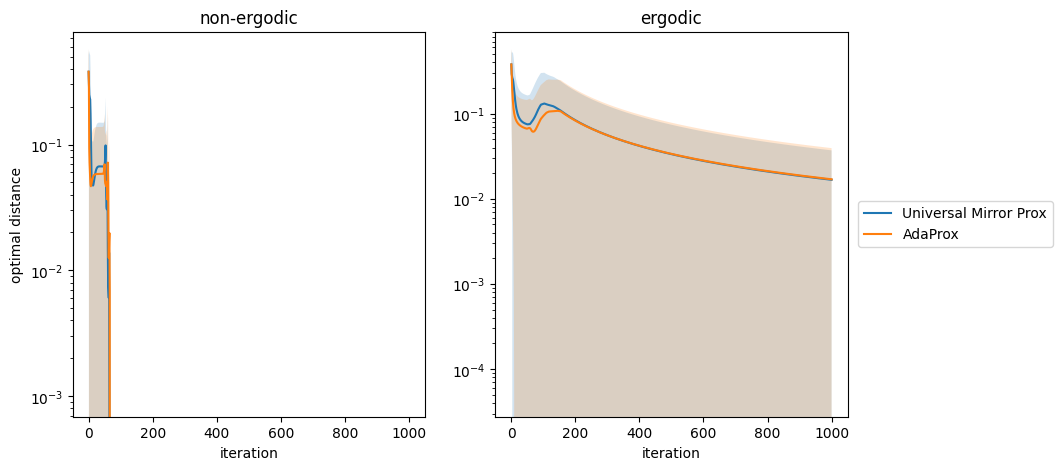

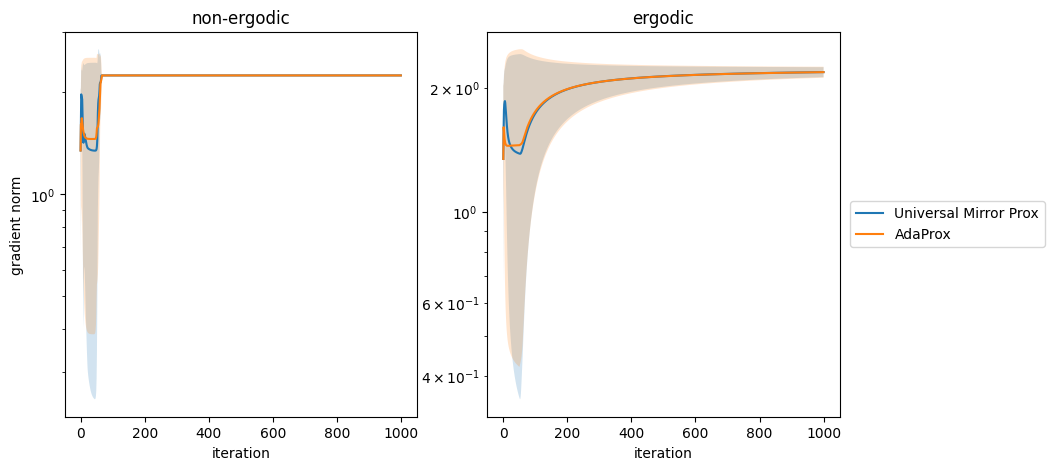

In [117]:
from problems import BattleOfTheSexesPb

pb = BattleOfTheSexesPb()
benchmark_pb(pb, is_drawable=True, show_sol=True)

# Prisoner's dilemma

trials ({'eg_eta': 1, 'ergodic': False}): 100%|██████████| 1/1 [00:00<00:00, 74.10it/s]


Solution Universal Mirror Prox:
                1.0
                1.0
Solution AdaProx:
                1.0
                1.0


trials ({'eg_eta': 1, 'ergodic': True}): 100%|██████████| 20/20 [00:02<00:00,  8.14it/s]


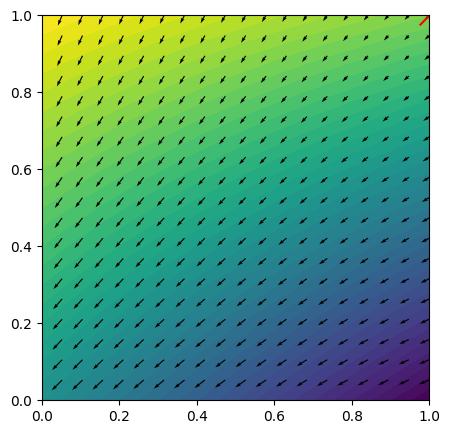

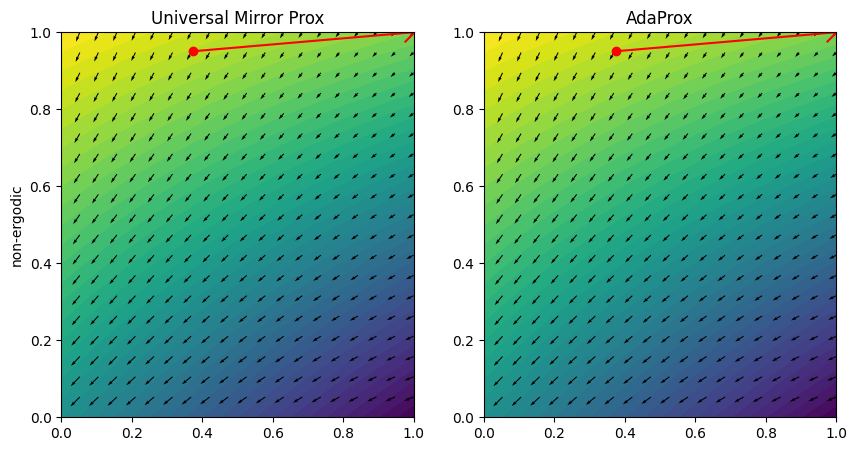

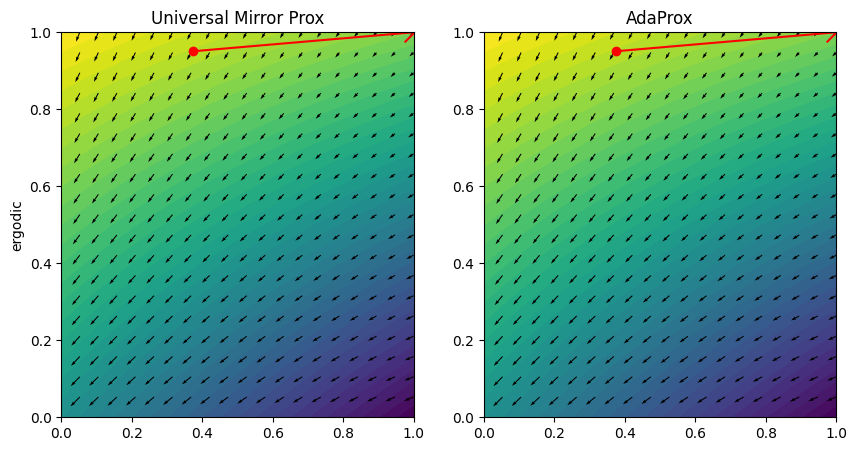

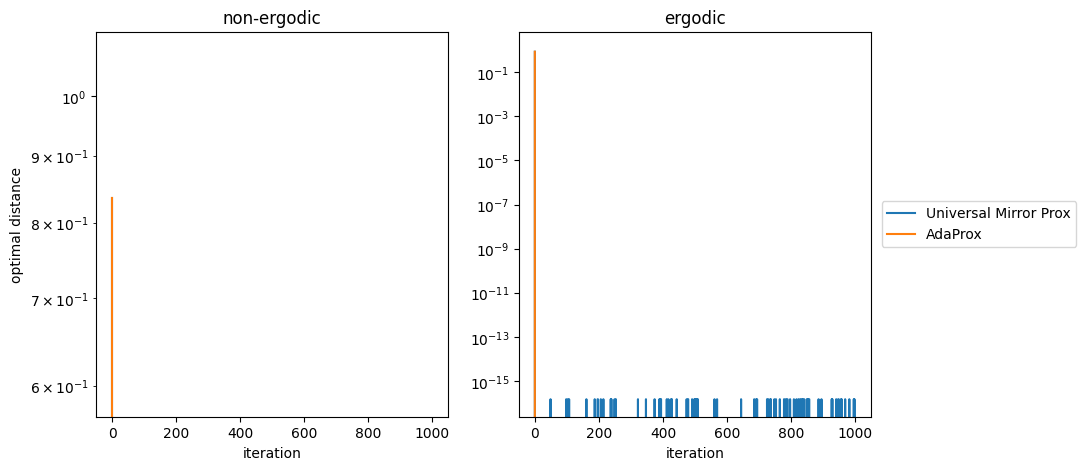

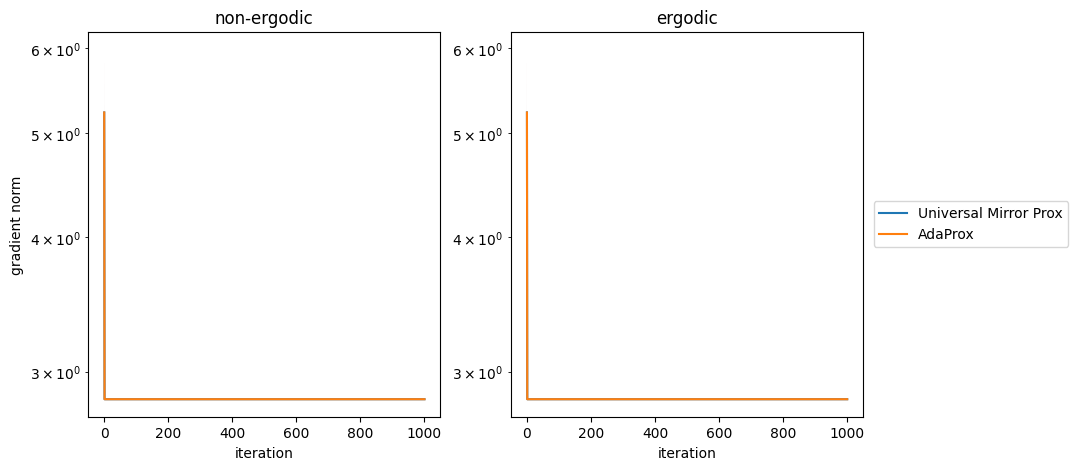

In [118]:
from problems import PrisonerDilemma

pb = PrisonerDilemma()
benchmark_pb(pb, is_drawable=True, show_sol=True)

# Paper bilinear 

trials ({'eg_eta': 1, 'ergodic': True}): 100%|██████████| 20/20 [00:02<00:00,  9.01it/s]


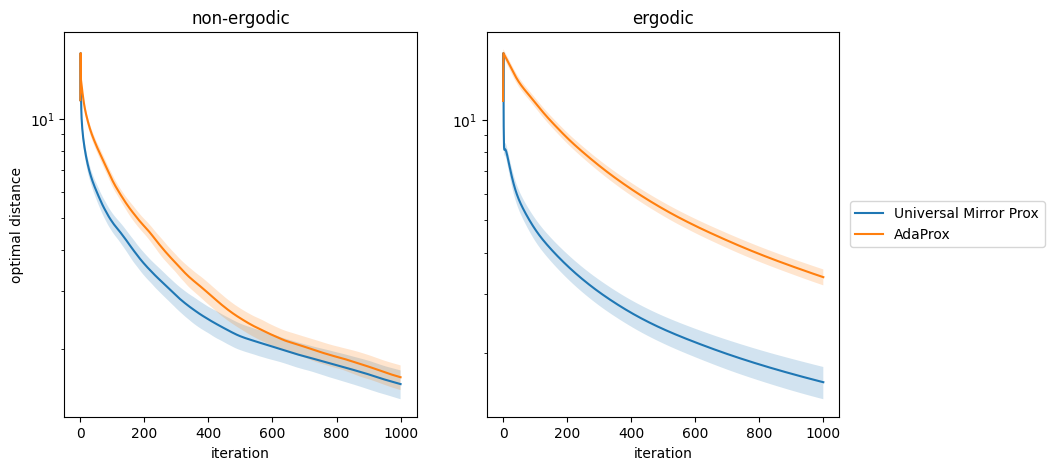

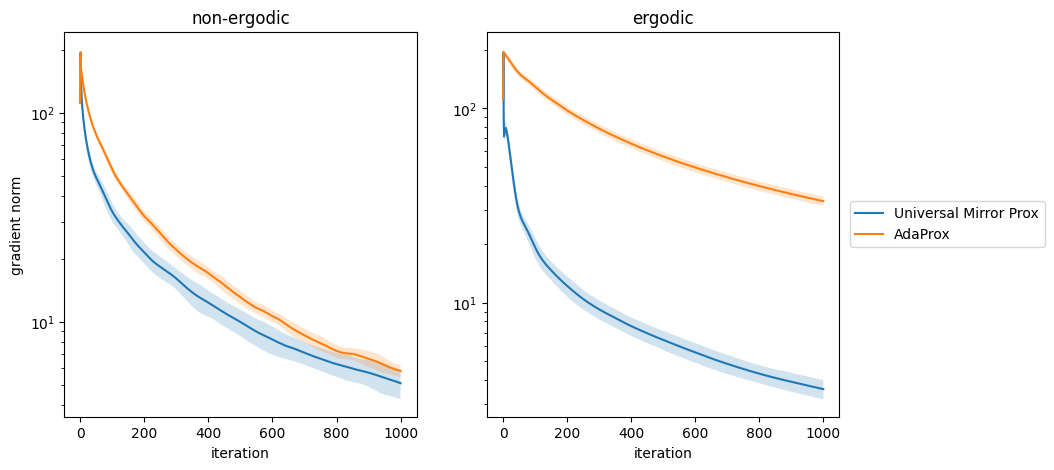

In [119]:
from problems import BilinearMinMax

pb = BilinearMinMax(dim=100, space=(-1, 1))
benchmark_pb(pb)

In [120]:
# WIP
# from problems import CovMatrixLearning

# pb = CovMatrixLearning(space=(-1, 1))
# benchmark_pb(pb)